In [ ]:
!pip install transformers
!pip install diffusers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importaciones**

In [ ]:
from diffusers import DiffusionPipeline
from PIL import Image
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

**Inicialización del modelo de generación de arte.**

In [ ]:
arte = DiffusionPipeline.from_pretrained("lambdalabs/sd-image-variations-diffusers")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

image_encoder/model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

**Ruta archivo imagen.**

In [ ]:
ruta_carpeta = '/content/sample_data/img'

In [ ]:
archivos_en_carpeta = os.listdir(ruta_carpeta)

In [ ]:
archivos_de_imagen = [archivo for archivo in archivos_en_carpeta if archivo.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

In [ ]:
for imagen in archivos_de_imagen:
    ruta_imagen = os.path.join(ruta_carpeta, imagen)
    print('Ruta de la imagen:', ruta_imagen)
    imagen = Image.open(ruta_imagen)

Ruta de la imagen: /content/sample_data/img/1mg1mpr (11).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (24).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (12).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (29).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (22).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (27).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (28).jpg
Ruta de la imagen: /content/sample_data/img/1mg1mpr (16).jpg


**Procesamiento imagen con el modelo seleccionado.**

In [ ]:
imagen_procesada = arte(imagen)


  0%|          | 0/50 [00:00<?, ?it/s]

**Impresión imagen**

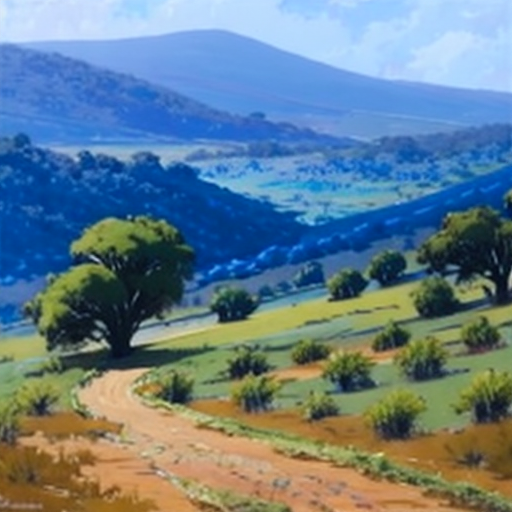

In [ ]:
imagen = imagen_procesada.images[0]
display(imagen)

In [ ]:
model_path = "/content/drive/MyDrive/Modelo_entrenado_1"
arte.save_pretrained(model_path)

In [ ]:
# Desmontar el drive
drive.flush_and_unmount()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
!ls /content/drive/MyDrive/Modelo_entrenado_1

feature_extractor  image_encoder  model_index.json  safety_checker  scheduler  unet  vae


In [ ]:
# Carga del modelo guardado desde Google Drive
model_path = "/content/drive/MyDrive/Modelo_entrenado_1"
arte = DiffusionPipeline.from_pretrained(model_path)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Función para procesar la imagen
def generar_imagen(input_image):
    imagen_procesada = arte(input_image)
    return imagen_procesada.images[0]

In [ ]:
# Creación la interfaz con Gradio
iface = gr.Interface(
    fn=generar_imagen,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil"),
    title="Generador de cuadros del mismo estilo"
)

In [ ]:
# Interfaz
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://80b4410858fe9aacf1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
